<a href="https://colab.research.google.com/github/ElahehJafarigol/Climate-Geospatial-Analysis/blob/main/Climate_Geospatial_Analysis_on_Python_with_Xarray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Climate Geospatial Analysis**

## **Imports**

In [48]:
# Uncomment to install necessary libraries
#!pip install xarray

In [49]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor

# Scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans

# TensorFlow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

import warnings
warnings.filterwarnings('ignore')

## **Loading Data**
Reference: Climate Geospatial Analysis with Python and Xarray project on Coursera.

Instructor: Danilo Lessa Bernardineli (https://danlessa.github.io/)

### Dataset

The data is collected from [ERA5-Land data from 1979 to 2020](https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-land?tab=overview)

ERA5-Land is a reanalysis dataset providing a consistent view of the evolution of land variables over several decades at an enhanced resolution compared to ERA5. ERA5-Land has been produced by replaying the land component of the ECMWF ERA5 climate reanalysis. Reanalysis combines model data with observations from across the world into a globally complete and consistent dataset using the laws of physics. Reanalysis produces data that goes several decades back in time, providing an accurate description of the climate of the past.

ERA5-Land uses as input to control the simulated land fields ERA5 atmospheric variables, such as air temperature and air humidity. This is called the atmospheric forcing. Without the constraint of the atmospheric forcing, the model-based estimates can rapidly deviate from reality. Therefore, while observations are not directly used in the production of ERA5-Land, they have an indirect influence through the atmospheric forcing used to run the simulation. In addition, the input air temperature, air humidity and pressure used to run ERA5-Land are corrected to account for the altitude difference between the grid of the forcing and the higher resolution grid of ERA5-Land. This correction is called 'lapse rate correction'.

The ERA5-Land dataset, as any other simulation, provides estimates which have some degree of uncertainty. Numerical models can only provide a more or less accurate representation of the real physical processes governing different components of the Earth System. In general, the uncertainty of model estimates grows as we go back in time, because the number of observations available to create a good quality atmospheric forcing is lower. ERA5-land parameter fields can currently be used in combination with the uncertainty of the equivalent ERA5 fields.

The temporal and spatial resolutions of ERA5-Land makes this dataset very useful for all kind of land surface applications such as flood or drought forecasting. The temporal and spatial resolution of this dataset, the period covered in time, as well as the fixed grid used for the data distribution at any period enables decisions makers, businesses and individuals to access and use more accurate information on land states.

The data is between 1979 and 2020.

In [50]:
# Load dataset
ds_original = xr.open_dataset('/content/drive/MyDrive/Colab_Notebooks/Geo-spatial data/data.nc')

### Dimensions

**time:** The temporal dimension, often used for time series analysis.

**latitude:** The spatial dimension representing latitude.

**longitude:** The spatial dimension representing longitude.

In ERA5 and ERA5-Land datasets, the expver (experiment version) variable is used to differentiate between multiple versions of the data. It helps to track changes, updates, or re-runs of the reanalysis. Typically, expver is a coordinate in the dataset that allows users to distinguish between different versions or experiments.

Versions: expver can denote different versions of the reanalysis data. For example, there might be a version 1 for the initial data release and version 5 for a reanalysis run with updated methods or corrections.

**Note:** Version 1 is used for this analysis.

In [51]:
ds = ds_original.sel(expver = 1)
ds

<xarray.Dataset>
Dimensions:    (longitude: 142, latitude: 89, time: 500)
Coordinates:
  * longitude  (longitude) float32 -82.0 -81.75 -81.5 ... -47.25 -47.0 -46.75
  * latitude   (latitude) float32 6.0 5.75 5.5 5.25 ... -15.5 -15.75 -16.0
    expver     int32 1
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
Data variables:
    lai_hv     (time, latitude, longitude) float32 ...
    skt        (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

### Variable Discriptions

**lai_hv:** Leaf area index, high vegetation (unit m2 m-2)
This parameter is the surface area of one side of all the leaves found over an area of land for vegetation classified as 'high'. This parameter has a value of 0 over bare ground or where there are no leaves. It can be calculated daily from satellite data. It is important for forecasting, for example, how much rainwater will be intercepted by the vegetative canopy, rather than falling to the ground.

**skt:** The skin temperature is the theoretical temperature that is required to satisfy the surface energy balance. It represents the temperature of the uppermost surface layer, which has no heat capacity and so can respond instantaneously to changes in surface fluxes. SKT is calculated differently over land and sea and is measured in kelvin (K). To convert kelvin to degrees Celsius (°C), subtract 273.15.

**tp:** Total precipitation in ERA5-Land is the sum of large-scale and convective precipitation, measured in meters. Large-scale precipitation is caused by weather patterns like troughs and cold fronts, while convective precipitation is caused by convection, which happens when lower atmospheric air is warmer and less dense than the air above.

ERA5-Land data is available on a regular latitude-longitude grid with a resolution of 0.1° x 0.1° and is available from 1950 to the present in hourly time steps.


In [52]:
# Select variables
lai_hv = ds['lai_hv']
skt = ds['skt']
tp = ds['tp']

## Visualization of Enviromental Vriables

### Temporal evolution  

The objective of this analysis is to understand the patterns and trends in total precipitation, skin temperature, and Leaf Area Index (LAI) using the ERA5-Land dataset. We focus on the mean values over different time scales: overall, yearly, and monthly.

The data used for this analysis is the ERA5-Land hourly data on total precipitation (tp), skin temperature (skt), and Leaf Area Index (lai_hv). We compute the mean values across the spatial dimensions (latitude and longitude) and plot the results over time.

**Total precipitation**

Mean Total Precipitation:

We calculated the mean total precipitation by averaging across all spatial dimensions (latitude and longitude). This gives us a general view of how total precipitation has changed over time.

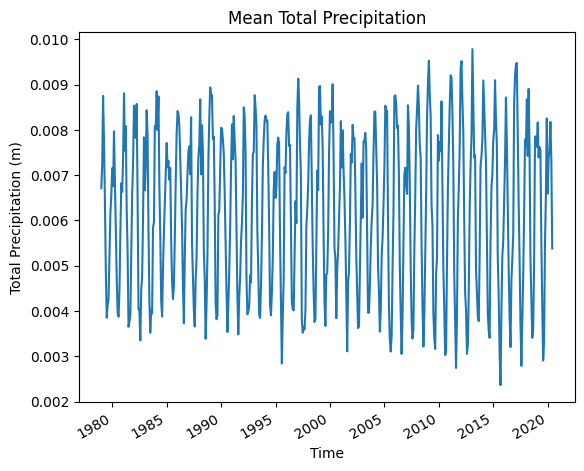

In [53]:
# Calculate the mean total precipitation over all spatial dimensions (latitude and longitude)
mean_pt = tp.mean(dim=['latitude', 'longitude'])

# Plot the time series of mean total precipitation
mean_pt.plot()
plt.title('Mean Total Precipitation')  # Title of the plot
plt.xlabel('Time')                    # Label for the x-axis
plt.ylabel('Total Precipitation (m)') # Label for the y-axis
plt.show()                            # Display the plot

Yearly Mean Total Precipitation:

The yearly mean total precipitation was calculated by grouping the data by year and averaging over time, latitude, and longitude. This approach helps in understanding the annual variations and long-term trends in precipitation.

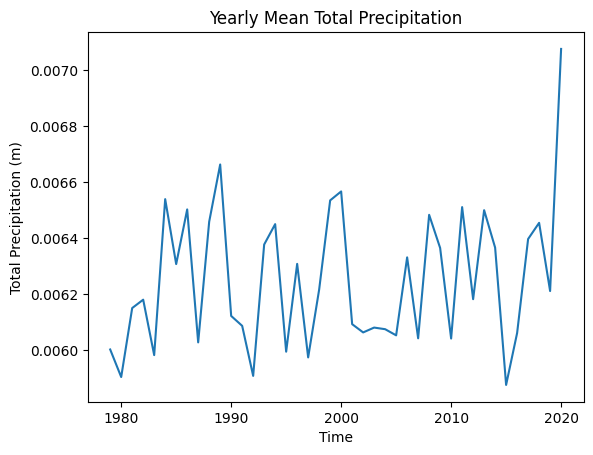

In [54]:
# Calculate the yearly mean total precipitation
yearly_mean_pt = tp.groupby(tp.time.dt.year).mean(dim=['time','latitude', 'longitude'])

# Plot a time series of mean values over the entire spatial domain for each year
yearly_mean_pt.plot()
plt.title('Yearly Mean Total Precipitation')  # Title of the plot
plt.xlabel('Time')                           # Label for the x-axis
plt.ylabel('Total Precipitation (m)')        # Label for the y-axis
plt.show()                                   # Display the plot

Monthly Mean Total Precipitation:

The monthly mean total precipitation was computed by grouping the data by month and averaging over time, latitude, and longitude. This reveals the seasonal patterns and monthly variations in precipitation.

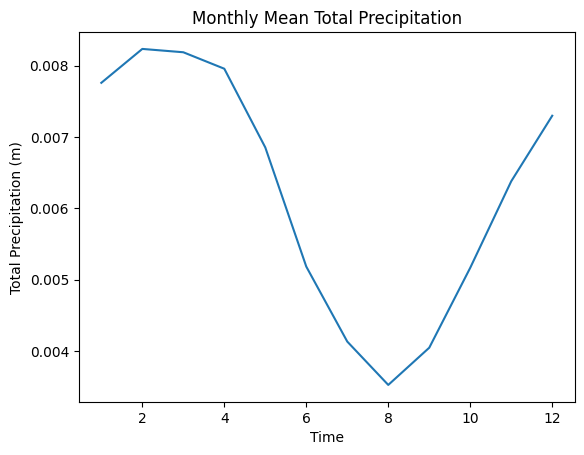

In [55]:
# Calculate the monthly mean total precipitation
monthly_mean_pt = tp.groupby(tp.time.dt.month).mean(dim=['time', 'latitude', 'longitude'])

# Plot a time series of mean values over the entire spatial domain for each month
monthly_mean_pt.plot()
plt.title('Monthly Mean Total Precipitation')  # Title of the plot
plt.xlabel('Time')                            # Label for the x-axis
plt.ylabel('Total Precipitation (m)')         # Label for the y-axis
plt.show()

**Skin temperature**

Mean Skin Temperature:

We calculated the mean skin temperature by averaging across all spatial dimensions (latitude and longitude). This gives a general view of how skin temperature has changed over time.

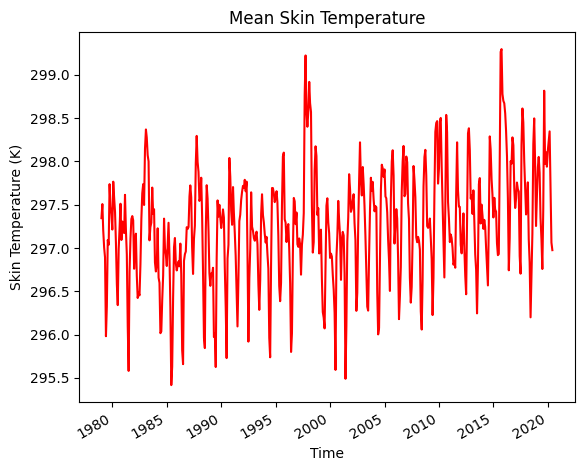

In [56]:
# Calculate the mean skin temperature over all spatial dimensions (latitude and longitude)
mean_skt = skt.mean(dim=['latitude', 'longitude'])

# Plot the time series of mean skin temperature
mean_skt.plot(color='red')
plt.title('Mean Skin Temperature')  # Title of the plot
plt.xlabel('Time')                 # Label for the x-axis
plt.ylabel('Skin Temperature (K)') # Label for the y-axis
plt.show()                         # Display the plot


Yearly Mean Skin Temperature:

The yearly mean skin temperature was calculated by grouping the data by year and averaging over time, latitude, and longitude. This helps in understanding the annual variations and long-term trends in skin temperature.

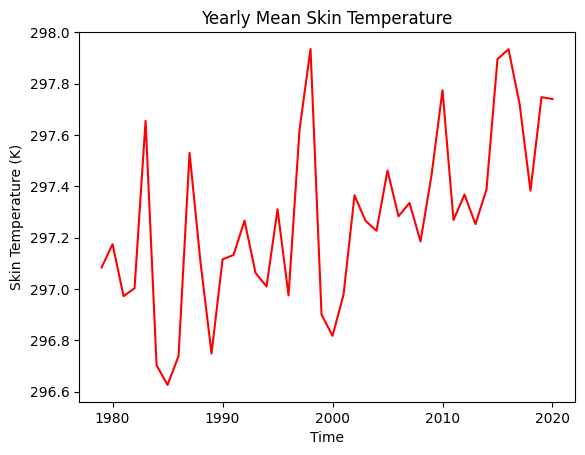

In [57]:
# Calculate the yearly mean skin temperature
yearly_mean_skt = skt.groupby(skt.time.dt.year).mean(dim=['time', 'latitude', 'longitude'])

# Plot a time series of mean values over the entire spatial domain for each year
yearly_mean_skt.plot(color='red')
plt.title('Yearly Mean Skin Temperature')  # Title of the plot
plt.xlabel('Time')                        # Label for the x-axis
plt.ylabel('Skin Temperature (K)')        # Label for the y-axis
plt.show()                                # Display the plot

Monthly Mean Skin Temperature:

The monthly mean skin temperature was computed by grouping the data by month and averaging over time, latitude, and longitude. This reveals the seasonal patterns and monthly variations in skin temperature.

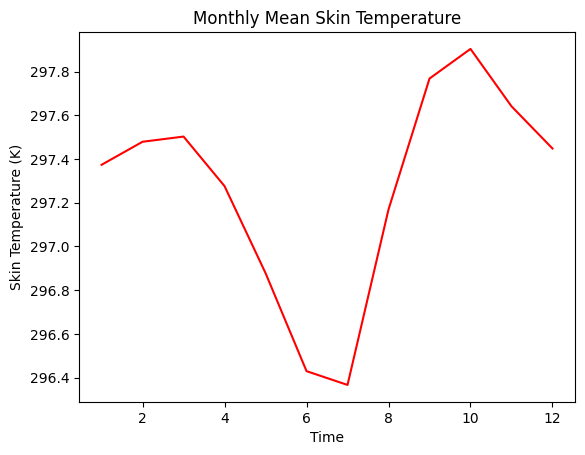

In [58]:
# Calculate the monthly mean skin temperature
monthly_mean_skt = skt.groupby(skt.time.dt.month).mean(dim=['time', 'latitude', 'longitude'])

# Plot a time series of mean values over the entire spatial domain for each month
monthly_mean_skt.plot(color='red')
plt.title('Monthly Mean Skin Temperature')  # Title of the plot
plt.xlabel('Time')                         # Label for the x-axis
plt.ylabel('Skin Temperature (K)')         # Label for the y-axis
plt.show()                                 # Display the plot

**Leaf Area Index, High Vegetation**

Mean Leaf Area Index (LAI):

We calculated the mean Leaf Area Index (LAI) by averaging across all spatial dimensions (latitude and longitude). This gives a general view of how LAI has changed over time.

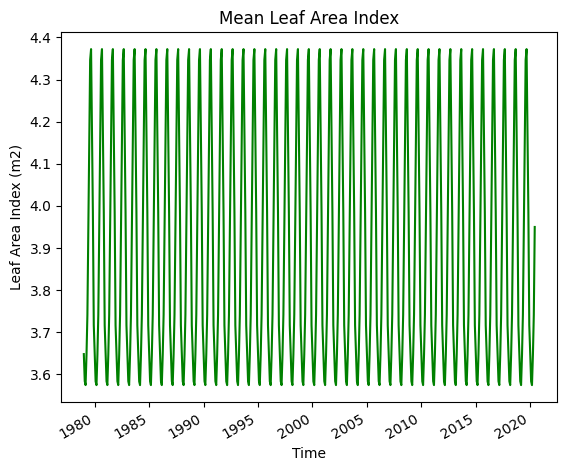

In [59]:
# Calculate the mean Leaf Area Index (LAI) over all spatial dimensions (latitude and longitude)
mean_lai_hv = lai_hv.mean(dim=['latitude', 'longitude'])

# Plot the time series of mean Leaf Area Index
mean_lai_hv.plot(color='green')
plt.title('Mean Leaf Area Index')    # Title of the plot
plt.xlabel('Time')                  # Label for the x-axis
plt.ylabel('Leaf Area Index (m2)')  # Label for the y-axis
plt.show()                          # Display the plot

Yearly Mean Leaf Area Index:

The yearly mean Leaf Area Index was calculated by grouping the data by year and averaging over time, latitude, and longitude. This helps in understanding the annual variations and long-term trends in LAI.

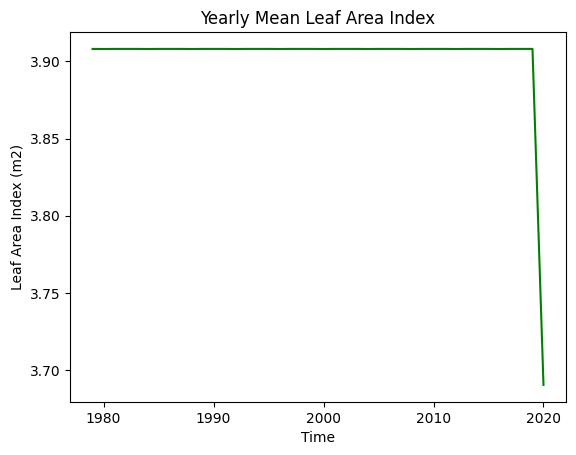

In [60]:
# Calculate the yearly mean Leaf Area Index
yearly_mean_lai_hv = lai_hv.groupby(lai_hv.time.dt.year).mean(dim=['time', 'latitude', 'longitude'])

# Plot a time series of mean values over the entire spatial domain for each year
yearly_mean_lai_hv.plot(color='green')
plt.title('Yearly Mean Leaf Area Index')    # Title of the plot
plt.xlabel('Time')                         # Label for the x-axis
plt.ylabel('Leaf Area Index (m2)')         # Label for the y-axis
plt.show()                                 # Display the plot

Monthly Mean Leaf Area Index:

The monthly mean Leaf Area Index was computed by grouping the data by month and averaging over time, latitude, and longitude. This reveals the seasonal patterns and monthly variations in LAI.

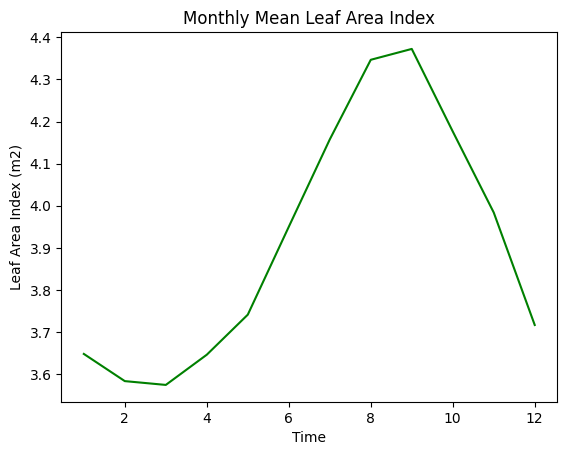

In [61]:
# Calculate the monthly mean Leaf Area Index
monthly_mean_lai_hv = lai_hv.groupby(lai_hv.time.dt.month).mean(dim=['time', 'latitude', 'longitude'])

# Plot a time series of mean values over the entire spatial domain for each month
monthly_mean_lai_hv.plot(color='green')
plt.title('Monthly Mean Leaf Area Index')    # Title of the plot
plt.xlabel('Time')                          # Label for the x-axis
plt.ylabel('Leaf Area Index (m2)')          # Label for the y-axis
plt.show()

This analysis provides a comprehensive overview of total precipitation, skin temperature, and Leaf Area Index patterns using the ERA5-Land dataset. By examining mean values over different time scales, we can better understand the temporal dynamics of these variables and identify trends relevant for climate studies, environmental monitoring, and resource management.

### Spatial Distribution Analyis

The objective of this report is to analyze the spatial distribution and changes of key environmental variables, including Total Precipitation (tp), Skin Temperature (skt). This analysis provides insights into the spatial variability of these variables across different geographical regions.

The data used for this analysis is the ERA5-Land hourly data on total precipitation, skin temperature, and leaf area index. We conducted various analyses to understand the spatial distribution of these variables, including mean calculations over different time periods and seasonal variations.

**Total Precipitation**

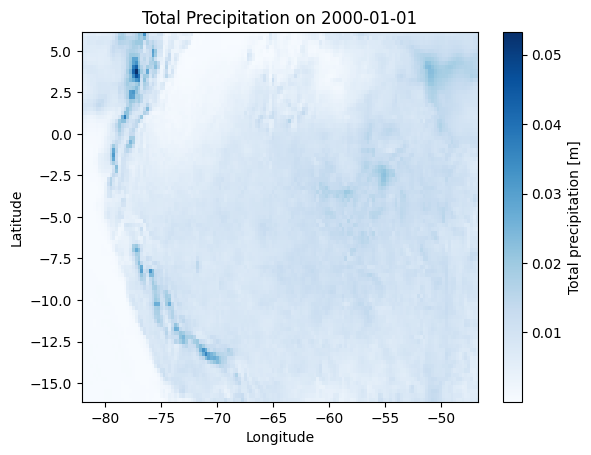

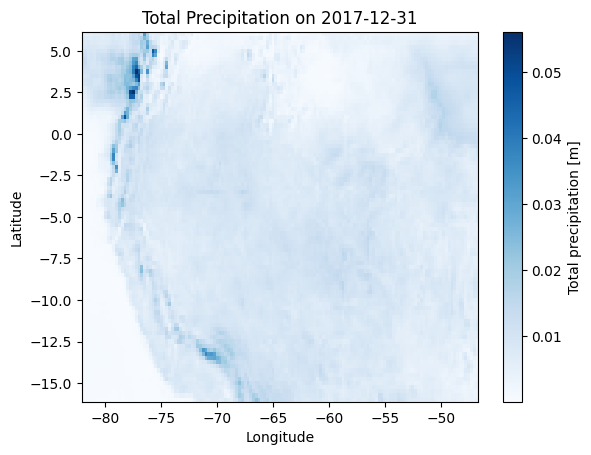

In [62]:
# Select and plot the spatial distribution of total precipitation for January 1, 2000
tp.sel(time='2000-01-01', method='nearest').plot(cmap='Blues')
plt.title('Total Precipitation on 2000-01-01')  # Title of the plot
plt.xlabel('Longitude')                        # Label for the x-axis
plt.ylabel('Latitude')                         # Label for the y-axis
plt.show()                                     # Display the plot

# Select and plot the spatial distribution of total precipitation for December 31, 2017
tp.sel(time='2017-12-31', method='nearest').plot(cmap='Blues')
plt.title('Total Precipitation on 2017-12-31')  # Title of the plot
plt.xlabel('Longitude')                        # Label for the x-axis
plt.ylabel('Latitude')                         # Label for the y-axis
plt.show()                                     # Display the plot


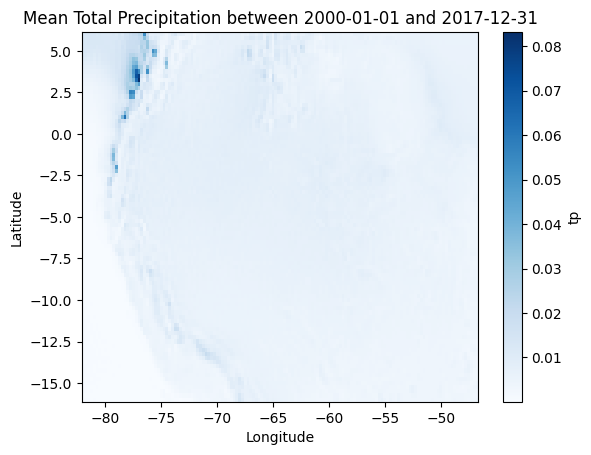

In [63]:
# Define the time period for the analysis
time_period = slice('2000-01-01', '2017-12-31')

# Calculate the mean total precipitation over the specified time period
tp_mean = tp.sel(time=time_period).mean(dim=['time'])

# Plot the spatial distribution of mean total precipitation
tp_mean.plot(cmap='Blues')
plt.title('Mean Total Precipitation between 2000-01-01 and 2017-12-31')  # Title of the plot
plt.xlabel('Longitude')                                           # Label for the x-axis
plt.ylabel('Latitude')                                            # Label for the y-axis
plt.show()

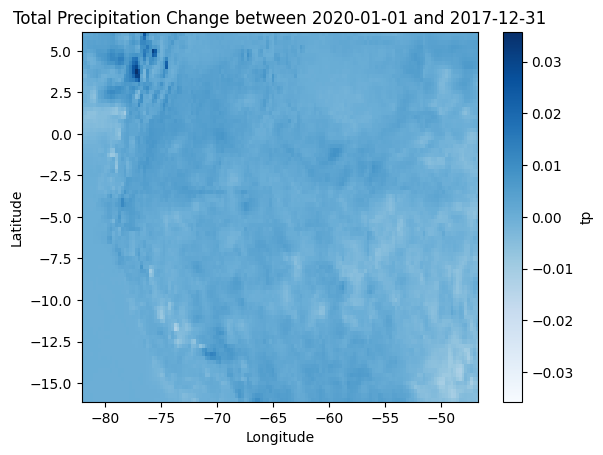

In [64]:
# Calculate the change in total precipitation between two dates
precip_change = (ds.tp.sel(time='2017-12-31', method='nearest')
               - ds.tp.sel(time='2020-01-01', method='nearest'))

# Plot the change in total precipitation
precip_change.plot(cmap='Blues')
plt.title('Total Precipitation Change between 2020-01-01 and 2017-12-31')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

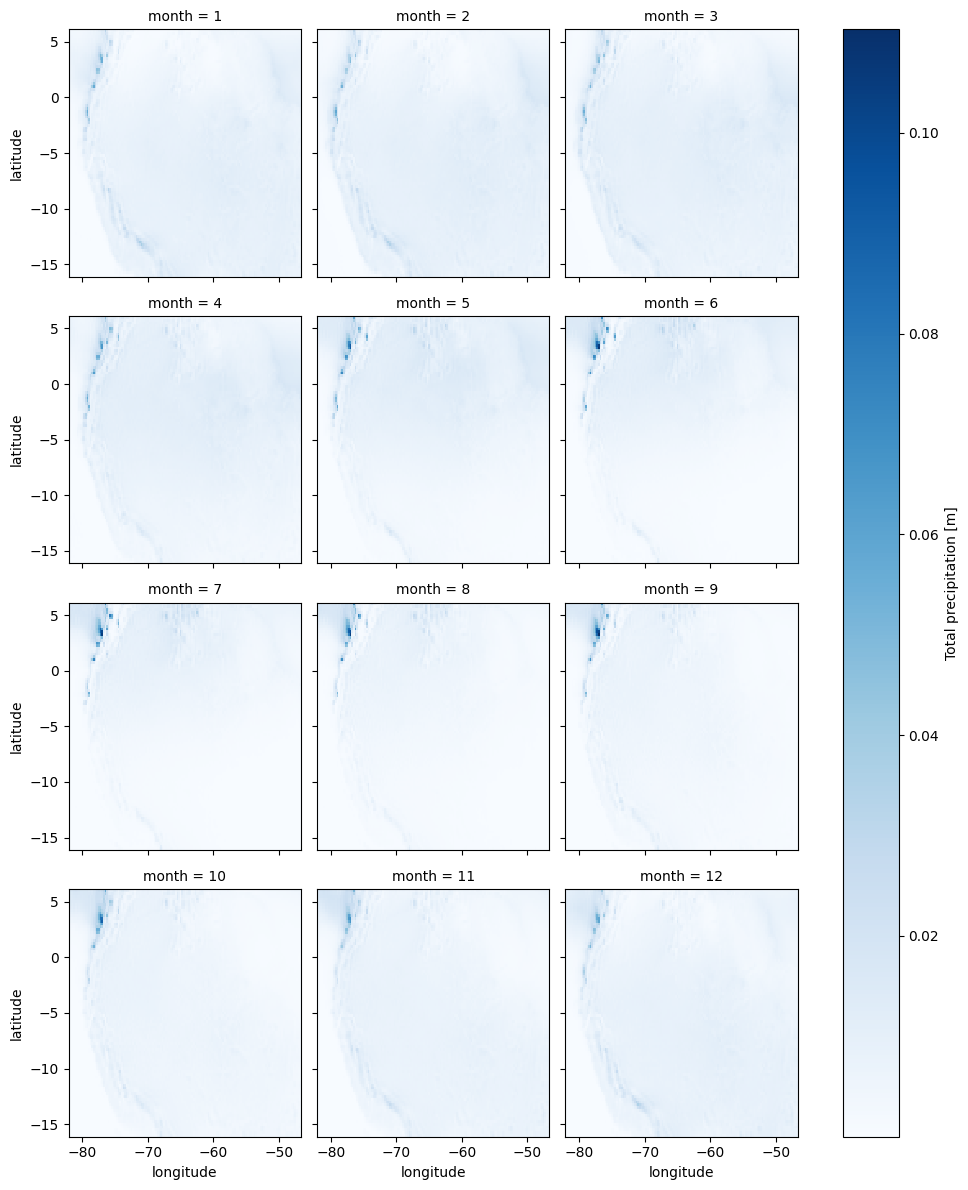

In [65]:
# Monthly Mean Total Precipitation
monthly_mean_tp = tp.groupby(tp.time.dt.month).mean(dim=['time'])

# Plot
monthly_mean_tp.plot(col = 'month', col_wrap = 3, cmap='Blues')
plt.show()

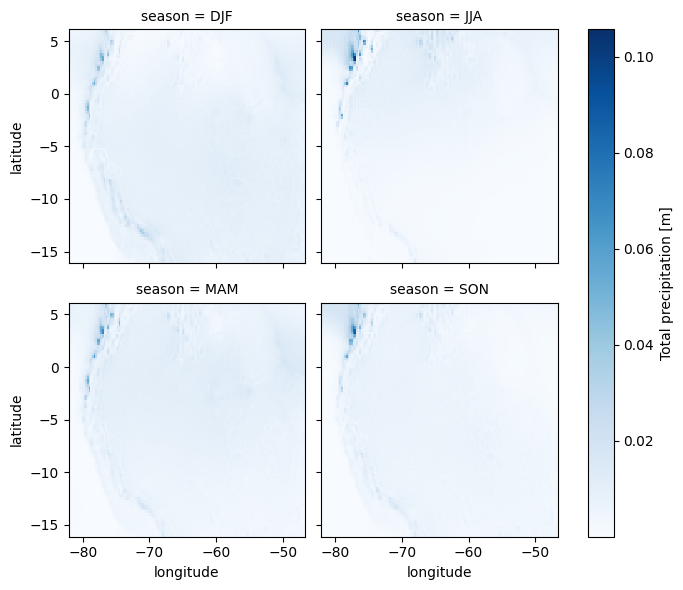

In [66]:
# Calculate the seasonal mean total precipitation by grouping data by season and averaging across all time points
seasonal_tp_mean = tp.groupby(tp.time.dt.season).mean(dim=['time'])

# Plot the spatial distribution of seasonal mean total precipitation
seasonal_tp_mean.plot(col='season', col_wrap=2, cmap='Blues')
plt.show()  # Display the plots

**Skin Temperature**

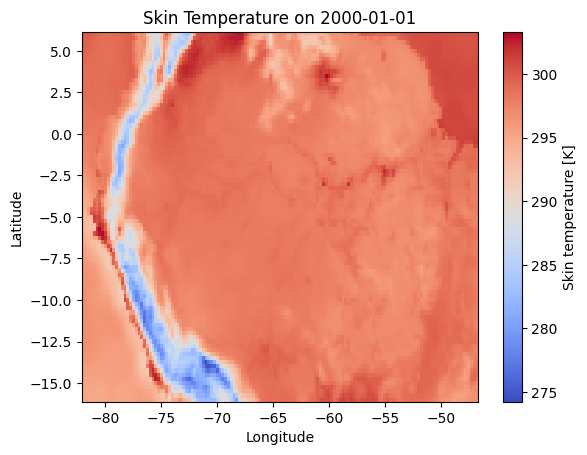

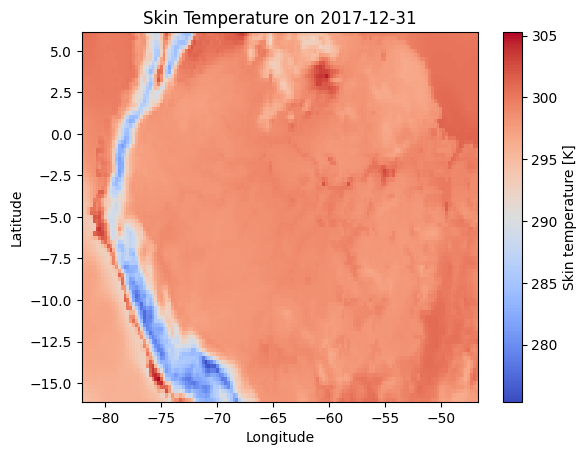

In [67]:
# Select and plot the spatial distribution of skin temperature for January 1, 2000
skt.sel(time='2000-01-01', method='nearest').plot(cmap='coolwarm')
plt.title('Skin Temperature on 2000-01-01')  # Title of the plot
plt.xlabel('Longitude')                      # Label for the x-axis
plt.ylabel('Latitude')                       # Label for the y-axis
plt.show()                                   # Display the plot

# Select and plot the spatial distribution of skin temperature for December 31, 2017
skt.sel(time='2017-12-31', method='nearest').plot(cmap='coolwarm')
plt.title('Skin Temperature on 2017-12-31')  # Title of the plot
plt.xlabel('Longitude')                      # Label for the x-axis
plt.ylabel('Latitude')                       # Label for the y-axis
plt.show()

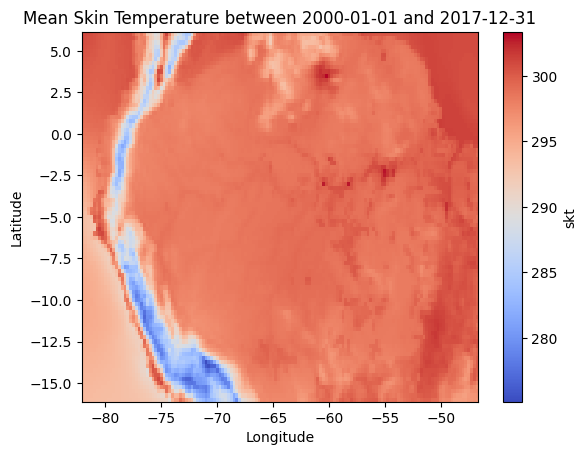

In [68]:
# Define the time period for the analysis
time_period = slice('2000-01-01', '2017-12-31')

# Calculate the mean skin temperature over the specified time period
skt_mean = skt.sel(time=time_period).mean(dim=['time'])

# Plot the spatial distribution of mean skin temperature
skt_mean.plot(cmap='coolwarm')
plt.title('Mean Skin Temperature between 2000-01-01 and 2017-12-31')  # Title of the plot
plt.xlabel('Longitude')                                              # Label for the x-axis
plt.ylabel('Latitude')                                               # Label for the y-axis
plt.show()

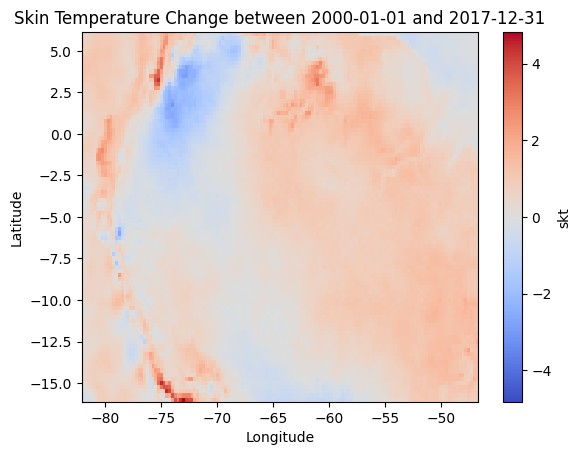

In [69]:
# Calculate the change in skin temperature between two dates
temp_change = (ds.skt.sel(time='2017-12-31', method='nearest')
               - ds.skt.sel(time='2000-01-01', method='nearest'))

# Plot the change in skin temperature
temp_change.plot(cmap='coolwarm')
plt.title('Skin Temperature Change between 2000-01-01 and 2017-12-31')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

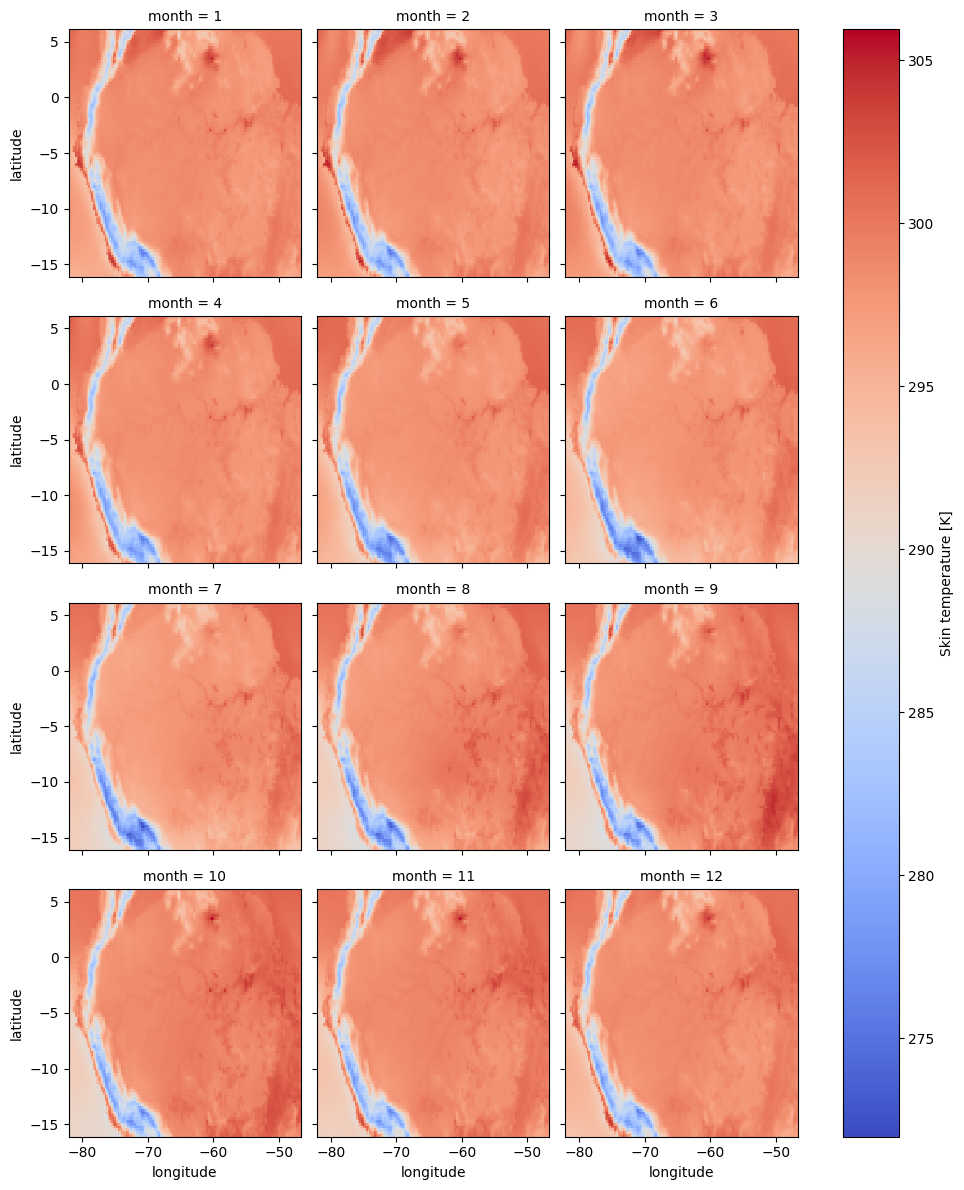

In [70]:
# Calculate the monthly mean skin temperature by grouping data by month and averaging across all time points
monthly_mean_skt = skt.groupby(skt.time.dt.month).mean(dim=['time'])

# Plot the spatial distribution of monthly mean skin temperature
monthly_mean_skt.plot(col='month', col_wrap=3, cmap='coolwarm')
plt.show()  # Display the plots

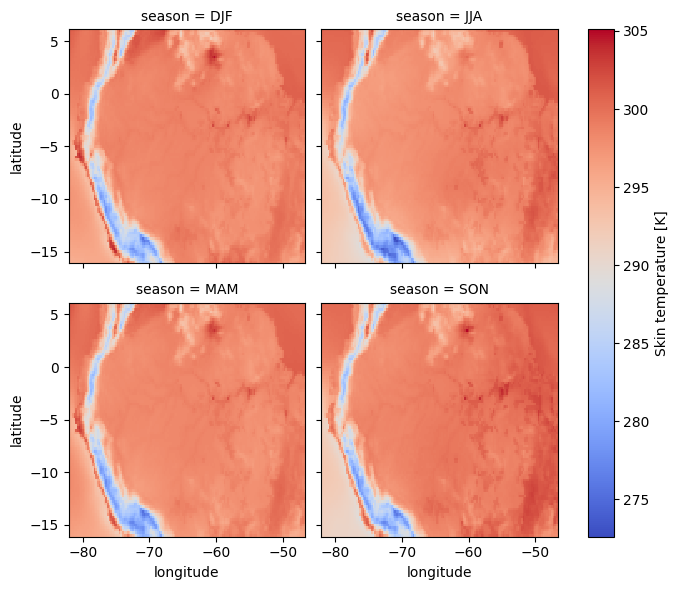

In [71]:
# Calculate the seasonal mean skin temperature by grouping data by season and averaging across all time points
seasonal_skt_mean = skt.groupby(skt.time.dt.season).mean(dim=['time'])

# Plot the spatial distribution of seasonal mean skin temperature
seasonal_skt_mean.plot(col='season', col_wrap=2, cmap='coolwarm')
plt.show()  # Display the plots

**Leaf Area Index-High Vegitation**

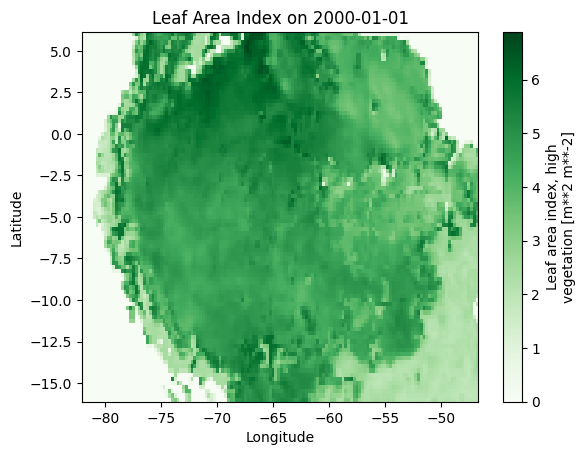

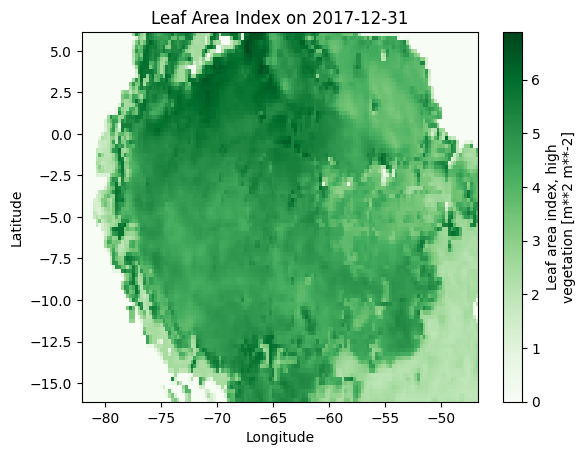

In [72]:
# Select and plot the spatial distribution of leaf area index for January 1, 2000
lai_hv.sel(time='2000-01-01', method='nearest').plot(cmap='Greens')
plt.title('Leaf Area Index on 2000-01-01')  # Title of the plot
plt.xlabel('Longitude')                     # Label for the x-axis
plt.ylabel('Latitude')                      # Label for the y-axis
plt.show()                                  # Display the plot

# Select and plot the spatial distribution of leaf area index for December 31, 2017
lai_hv.sel(time='2017-12-31', method='nearest').plot(cmap='Greens')
plt.title('Leaf Area Index on 2017-12-31')  # Title of the plot
plt.xlabel('Longitude')                     # Label for the x-axis
plt.ylabel('Latitude')                      # Label for the y-axis
plt.show()

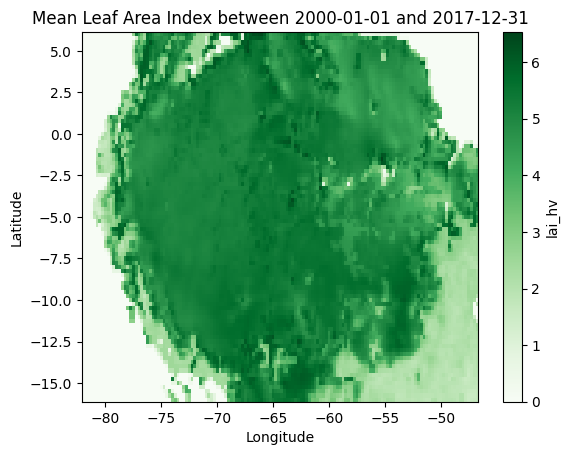

In [73]:
# Define the time period for the analysis
time_period = slice('2000-01-01', '2017-12-31')

# Calculate the mean leaf area index over the specified time period
lai_hv_mean = lai_hv.sel(time=time_period).mean(dim=['time'])

# Plot the spatial distribution of mean leaf area index
lai_hv_mean.plot(cmap='Greens')
plt.title('Mean Leaf Area Index between 2000-01-01 and 2017-12-31')  # Title of the plot
plt.xlabel('Longitude')                                             # Label for the x-axis
plt.ylabel('Latitude')                                              # Label for the y-axis
plt.show()

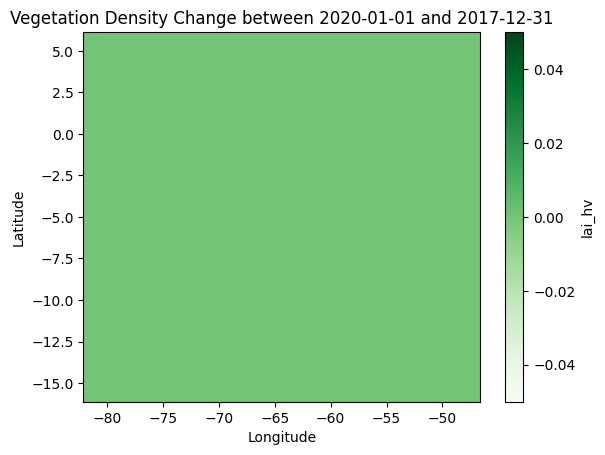

In [74]:
# Calculate the change in vegetation density between two dates
vegi_change = (ds.lai_hv.sel(time='2017-12-31', method='nearest')
               - ds.lai_hv.sel(time='2020-01-01', method='nearest'))

# Plot the change in vegetation density
vegi_change.plot(cmap='Greens')
plt.title('Vegetation Density Change between 2020-01-01 and 2017-12-31')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

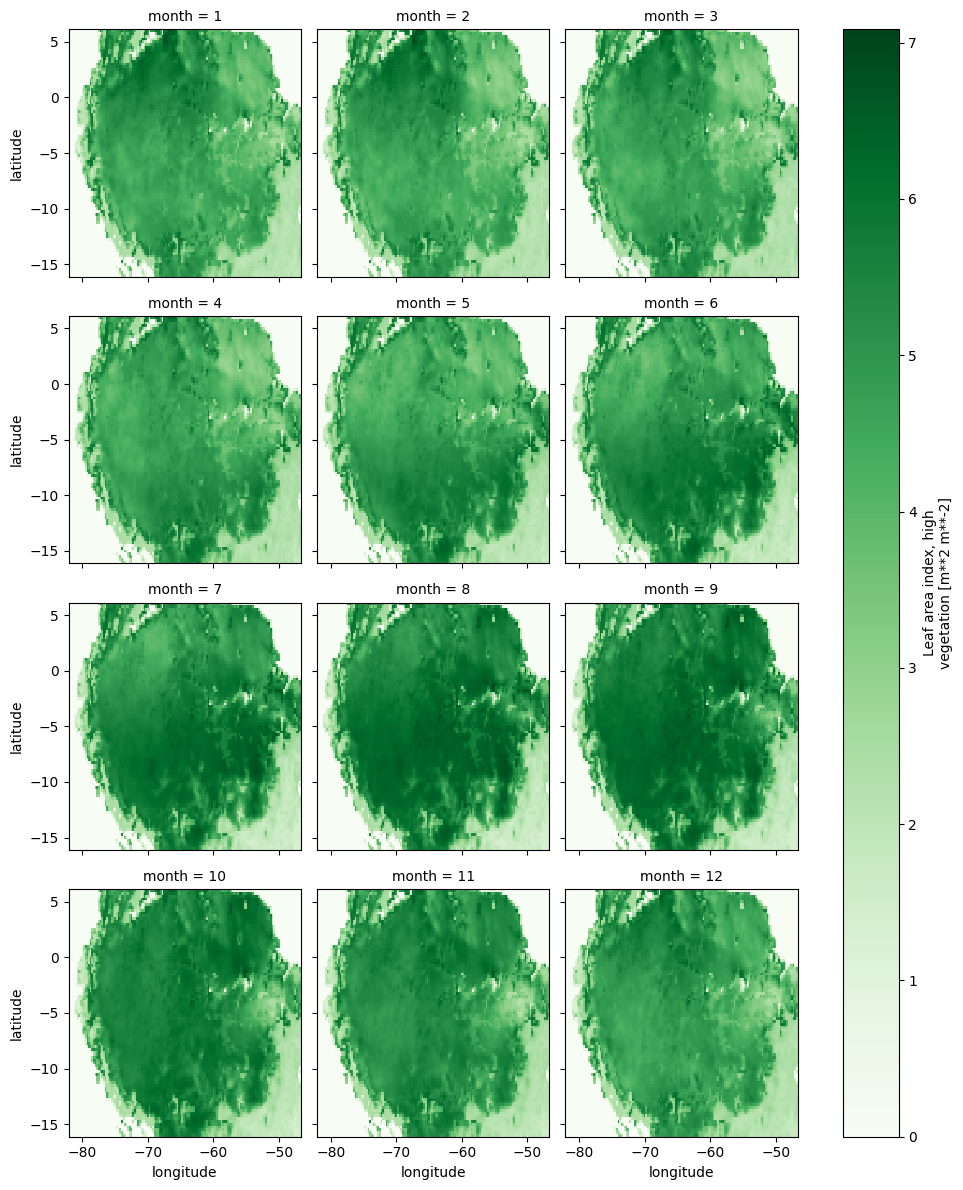

In [75]:
# Calculate the monthly mean leaf area index by grouping data by month and averaging across all time points
monthly_mean_lai_hv = lai_hv.groupby(lai_hv.time.dt.month).mean(dim=['time'])

# Plot the spatial distribution of monthly mean leaf area index
monthly_mean_lai_hv.plot(col='month', col_wrap=3, cmap='Greens')
plt.show()  # Display the plots

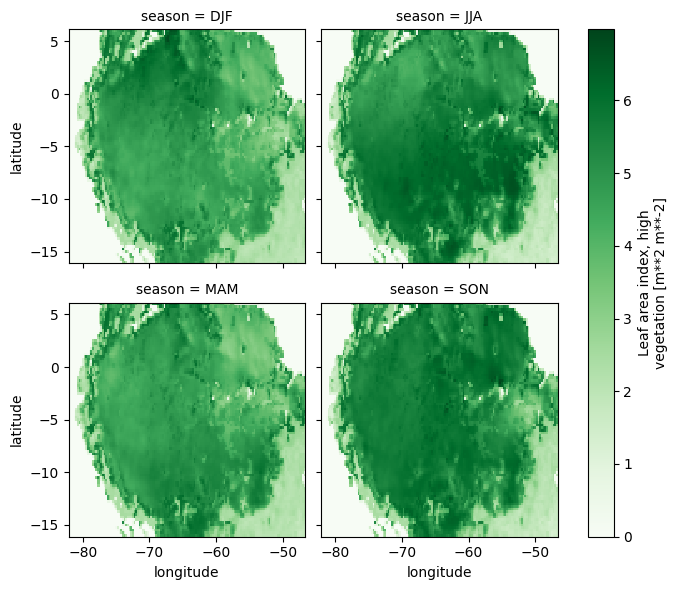

In [76]:
# Calculate the seasonal mean leaf area index by grouping data by season and averaging across all time points
seasonal_lai_mean = lai_hv.groupby(lai_hv.time.dt.season).mean(dim=['time'])

# Plot the spatial distribution of seasonal mean leaf area index
seasonal_lai_mean.plot(col='season', col_wrap=2, cmap='Greens')
plt.show()  # Display the plots

**Results:**

*Total Precipitation:*

The spatial distribution of total precipitation was analyzed to understand the average precipitation patterns across different regions. The analysis included mean precipitation calculations over monthly, yearly, and long-term periods.

*Skin Temperature:*

The spatial distribution of skin temperature was analyzed to understand the average surface temperature patterns across different regions. The analysis included mean skin temperature calculations over monthly, yearly, and long-term periods.

*Leaf Area Index:*

The spatial distribution of leaf area index was analyzed to understand the average vegetation density patterns across different regions. The analysis included mean leaf area index calculations over monthly, yearly, and long-term periods.

**Discussion:**

The analysis revealed spatial patterns in total precipitation, skin temperature, and leaf area index, highlighting regions with high and low values of these variables.
Seasonal variations in these variables were observed, indicating changes in environmental conditions over different seasons.
The spatial analysis provides valuable insights into the variability of these environmental variables, which is crucial for understanding regional climate patterns, ecological processes, and land management practices.

The analysis of changes in environmental variables provides insights into the temporal changes in skin temperature, total precipitation, and vegetation density, indicating areas of potential environmental change. These changes can have significant implications for ecosystems, agriculture, and climate patterns, highlighting the importance of monitoring and understanding environmental variables over time.

**Conclusion:**

The spatial analysis of total precipitation, skin temperature, and leaf area index provides valuable information about the spatial variability of these environmental variables. This analysis helps in understanding regional environmental patterns and can be used to inform decision-making processes related to climate change, agriculture, and land use planning.

The analysis of changes in skin temperature, total precipitation, and vegetation density provides valuable information about the temporal variability of these environmental variables. This information is essential for understanding and predicting environmental changes and their impacts on various ecosystems and human activities.

## **Analysis**

### Data Preprocessing

This code snippet prepares the data for training and testing a machine learning model to predict total precipitation (tp) using skin temperature (skt) and leaf area index (lai_hv) as features.

In [77]:
# Define the training and testing periods
train_period = slice('2000-01-01', '2017-12-31')
test_period = slice('2016-01-01', '2020-12-31')

# Convert the data to Pandas DataFrames
train_ds = ds.sel(time=train_period).to_dataframe()
test_ds = ds.sel(time=test_period).to_dataframe()

# Drop rows with missing values
train_ds.dropna(inplace=True)
test_ds.dropna(inplace=True)

# Reset the index
train_ds.reset_index(inplace=True)
test_ds.reset_index(inplace=True)

# Convert back to xarray Dataset
train_ds_xr = xr.Dataset.from_dataframe(train_ds)
test_ds_xr = xr.Dataset.from_dataframe(test_ds)

# Select the variables for training and testing
precip_train = train_ds[['time', 'tp', 'skt', 'lai_hv']]
precip_test = test_ds[['time', 'tp', 'skt', 'lai_hv']]

# Resample the data to monthly averages
monthly_precip_train = precip_train.resample('1M', on='time').mean()
monthly_precip_test = precip_test.resample('1M', on='time').mean()

# Define the features (X) and target (y) for training and testing
X_train = monthly_precip_train[['skt', 'lai_hv']]
y_train = monthly_precip_train['tp']
X_test = monthly_precip_test[['skt', 'lai_hv']]
y_test = monthly_precip_test['tp']

# Standardize the features and target variables
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)
y_train = scalar.fit_transform(y_train.to_numpy().reshape(-1, 1)).reshape(-1)
y_test = scalar.transform(y_test.to_numpy().reshape(-1, 1)).reshape(-1)

# Convert the data to float32
X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_test = y_test.astype(np.float32)

### Regression

This code snippet creates a linear/nonlinear regression model, fits it to the training data (X_train, y_train), makes predictions on the test data (X_test), and calculates the mean squared error and R-squared score to evaluate the model's performance.

#### Linear Regression

In [78]:
# Create the regression model
model_lr = LinearRegression()

# Fit the model to the data
model_lr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model_lr.predict(X_test)

# Calculate and print the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# Calculate and print the R-squared score
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 0.16
R-squared: 0.83


#### Support Vector Regression

In [79]:
# Create the regression model
model_svr = SVR(kernel='rbf', C=1e3, gamma=0.1)

# Fit the model to the data
model_svr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model_svr.predict(X_test)

# Calculate and print the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# Calculate and print the R-squared score
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 0.11
R-squared: 0.89


#### Random Forest Regression

In [80]:
# Create the Random Forest Regressor model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
model_rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model_rf.predict(X_test)

# Calculate and print the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# Calculate and print the R-squared score
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 0.08
R-squared: 0.92


#### Gradient Boosted Tree (XGBoost) Regression

In [81]:
# Create the XGBoost Regressor model
model_xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Fit the model to the training data
model_xgb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model_xgb.predict(X_test)

# Calculate and print the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# Calculate and print the R-squared score
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 0.11
R-squared: 0.89


#### Deep Learning: LSTM

In [82]:
# Reshape the data for LSTM (samples, timesteps, features)
X_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))

# Define the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(1, X_train.shape[1])))
lstm_model.add(Dense(32, activation='relu'))
lstm_model.add(Dense(16, activation='relu'))
lstm_model.add(Dense(1))

# Compile the model
lstm_model.compile(optimizer='adam', loss='mse')

# Fit the model to the training data
lstm_model.fit(X_lstm, y_train, epochs=200, verbose=0)

# Make predictions on the test data
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
y_pred_lstm = lstm_model.predict(X_test_reshaped)

# Calculate and print the mean squared error
mse = mean_squared_error(y_test, y_pred_lstm)
print(f'Mean Squared Error: {mse:.2f}')

# Calculate and print the R-squared score
r2 = r2_score(y_test, y_pred_lstm)
print(f'R-squared: {r2:.2f}')

2/2 [==============================] - 0s 7ms/step
Mean Squared Error: 0.11
R-squared: 0.89


## Geographical Regions Detection

The objective of this analysis is to cluster geographical locations based on environmental variables, including skin temperature, total precipitation, and vegetation density. Clustering helps identify regions with similar environmental characteristics, providing insights into geographical patterns of these variables.

### Data Preprocessing

In [83]:
# Convert the dataset to dataframes for training and testing
train_ds = ds.sel(time=slice('2000-01-01', '2017-12-31')).to_dataframe()
test_ds = ds.sel(time=slice('2016-01-01', '2020-12-31')).to_dataframe()

# Preprocess training data
cluster_train = train_ds
cluster_train.dropna(inplace=True)
cluster_train.reset_index(inplace=True)
cluster_train = cluster_train[['latitude', 'longitude', 'skt', 'tp', 'lai_hv']]

# Preprocess test data
cluster_test = test_ds
cluster_test.dropna(inplace=True)
cluster_test.reset_index(inplace=True)
cluster_test = cluster_test[['latitude', 'longitude', 'skt', 'tp', 'lai_hv']]

### K-Means Clustering



In [84]:
# Perform clustering
n_clusters = 8  # Number of clusters
kmeans = KMeans(n_clusters=n_clusters, n_init='auto', random_state=42)

# Get the cluster labels for the training data
kmeans.fit(cluster_train)

# Assign cluster labels to the training and test data
train_labels = kmeans.predict(cluster_train)
train_ds['cluster'] = train_labels

test_labels = kmeans.predict(cluster_test)
test_ds['cluster'] = test_labels

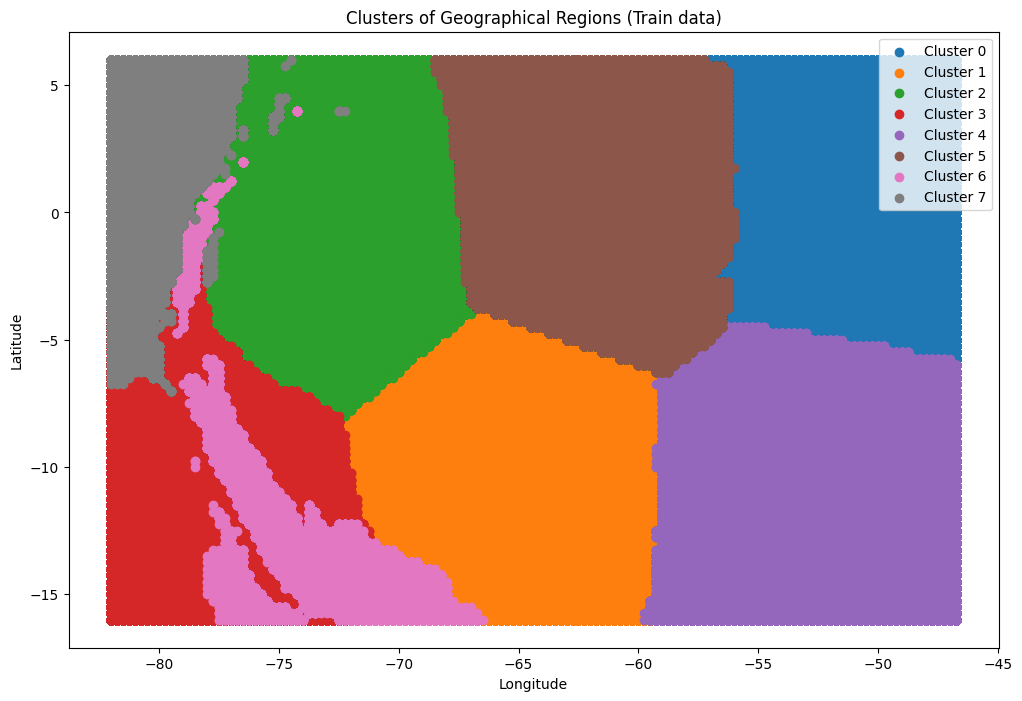

In [85]:
# Plot the clusters
plt.figure(figsize=(12, 8))

# Iterate over each cluster label
for cluster_label in range(n_clusters):
    # Get data points for the current cluster
    cluster_data = train_ds[train_ds['cluster'] == cluster_label]

    # Plot the data points for the current cluster
    plt.scatter(cluster_data['longitude'], cluster_data['latitude'], label=f'Cluster {cluster_label}')

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters of Geographical Regions (Train data)')
plt.legend(loc='upper right')  # Show legend
plt.show()


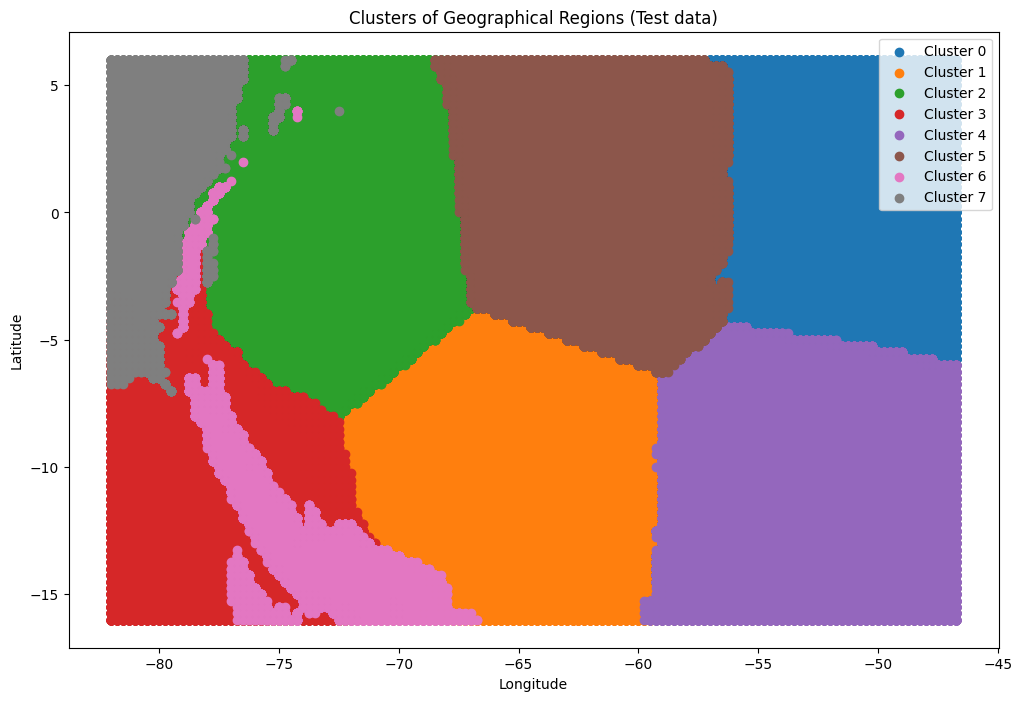

In [86]:
# Plot the clusters
plt.figure(figsize=(12, 8))

# Iterate over each cluster label
for cluster_label in range(n_clusters):
    # Get data points for the current cluster
    cluster_data = test_ds[test_ds['cluster'] == cluster_label]

    # Plot the data points for the current cluster
    plt.scatter(cluster_data['longitude'], cluster_data['latitude'], label=f'Cluster {cluster_label}')

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters of Geographical Regions (Test data)')
plt.legend(loc='upper right')  # Show legend
plt.show()

K-means clustering is employed to cluster the geographical locations into distinct groups based on the environmental variables. The number of clusters is set to 8 to identify a meaningful number of clusters without overfitting.

The clustering analysis reveals spatial patterns in environmental variables, providing insights into geographical similarities and differences.

These clusters can be used for further analysis, such as identifying regions with similar environmental characteristics for targeted interventions or research.